###### Делаем импорт всего, что нам понадобится

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils, to_categorical 

import matplotlib.pyplot as plt

Using TensorFlow backend.


##### Смотрим на данные

In [2]:
# читаем train
train = pd.read_csv('train.csv')
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,feature_769,class_label
0,0.468241,-0.298164,0.232144,0.236039,-0.121149,-0.154046,-0.316271,0.568260,0.215421,-0.330563,...,0.278312,-0.899671,-0.074011,-0.939633,0.246052,0.013475,0.265324,73,15,7
1,0.258637,0.299068,-0.513382,0.975493,-0.081143,-0.188614,-0.963915,0.800069,-0.592174,-0.770610,...,0.630870,-0.232211,-0.030725,0.057358,0.384939,-0.316699,0.331102,24,3,7
2,0.537912,0.173653,0.144184,-0.404364,-0.487603,-0.381795,-0.427099,0.279304,0.055201,0.418484,...,0.695762,-0.546673,-0.029725,0.364111,0.243729,0.454004,0.240177,89,13,7
3,-0.034786,0.129126,0.832070,-0.008820,-0.345535,-0.799636,-0.171435,-0.134418,0.562755,0.054717,...,0.009953,-0.535356,0.257352,0.069130,-0.836608,0.003982,0.752938,12,1,7
4,0.245363,-0.316505,0.092601,-0.151767,-0.252607,-0.144336,0.120053,0.118530,-0.077199,-0.028314,...,0.209629,-0.484586,0.007367,-0.261611,-0.115487,0.354035,0.113368,125,20,6


###### Видно, что feature_768 и 769 очень сильно отличаются от всех остальных, значит их нужно как-то нормализовать

###### Я пробовал 2 способа : логарифмировать все значения или разделить каждое значение столбца на максимальное значение в этом столбце - log показал себя лучше

In [3]:
train.shape

(90847, 771)

In [4]:
# смотрим распределение по классам
pd.value_counts(train['class_label'].values)

7     81399
4      2928
11     1220
5       954
6       822
1       631
9       563
0       531
8       505
10      428
12      308
3       252
13      180
2       126
dtype: int64

In [5]:
# проверяем количество nan в нашем фрейме
train.isnull().sum().sum()

0

In [6]:
train.iloc[:,-3] = np.log(train.iloc[:,-3])
train.iloc[:,-3].head()
# если ещё один раз сделать логарифм, то где-то вылетит деление на ноль, поэтому ограничимся одним

0    4.290459
1    3.178054
2    4.488636
3    2.484907
4    4.828314
Name: feature_768, dtype: float64

In [7]:
train.iloc[:,-2] = np.log(train.iloc[:,-2])
train.iloc[:,-2].head()

0    2.708050
1    1.098612
2    2.564949
3    0.000000
4    2.995732
Name: feature_769, dtype: float64

###### После того как значения этих фич немного оптимизировались, можно идти дальше

In [8]:
## shuffle and split the data into training and testing subsets
## no need to set test_size if train_size has been determined before and naoborot, but still for more understanding i keep it
# train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=0)
## success
# print("Training and testing split was successful, move on")

###### Изначально я делал сплит всей выборки на тестовую и трэйновую, пробуя разбивать в разных пропорциях

###### Но, видимо, из-за сильного дизбаланса в сторону класса номер 7, в тестовую выборку могло попадать его очень много, что плохо сказывалось на точности

###### Поэтому впоследствии я отказался от сплита выборки и обучал модель на всей

###### Проверяем, что в X и y лежит то, что нам необходимо для трэйна

In [9]:
X = train.iloc[:,:-1]
X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,feature_769
0,0.468241,-0.298164,0.232144,0.236039,-0.121149,-0.154046,-0.316271,0.568260,0.215421,-0.330563,...,-0.305612,0.278312,-0.899671,-0.074011,-0.939633,0.246052,0.013475,0.265324,4.290459,2.708050
1,0.258637,0.299068,-0.513382,0.975493,-0.081143,-0.188614,-0.963915,0.800069,-0.592174,-0.770610,...,-0.102153,0.630870,-0.232211,-0.030725,0.057358,0.384939,-0.316699,0.331102,3.178054,1.098612
2,0.537912,0.173653,0.144184,-0.404364,-0.487603,-0.381795,-0.427099,0.279304,0.055201,0.418484,...,0.221725,0.695762,-0.546673,-0.029725,0.364111,0.243729,0.454004,0.240177,4.488636,2.564949
3,-0.034786,0.129126,0.832070,-0.008820,-0.345535,-0.799636,-0.171435,-0.134418,0.562755,0.054717,...,-0.726146,0.009953,-0.535356,0.257352,0.069130,-0.836608,0.003982,0.752938,2.484907,0.000000
4,0.245363,-0.316505,0.092601,-0.151767,-0.252607,-0.144336,0.120053,0.118530,-0.077199,-0.028314,...,-0.254441,0.209629,-0.484586,0.007367,-0.261611,-0.115487,0.354035,0.113368,4.828314,2.995732


In [10]:
y = train.iloc[:, -1]
y.head()

0    7
1    7
2    7
3    7
4    6
Name: class_label, dtype: int64

In [11]:
# преобразование одномерного вектора в матрицу бинарных классов
Y = to_categorical(y)
print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
model = Sequential()

In [13]:
model.add(Dense(770, activation='relu', input_dim = 770))
model.add(Dropout(0.1))
model.add(Dense(1540, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(14, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 770)               593670    
_________________________________________________________________
dropout_1 (Dropout)          (None, 770)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1540)              1187340   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1540)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 14)                21574     
Total params: 1,802,584
Trainable params: 1,802,584
Non-trainable params: 0
___________

###### Из всех различных комбинаций различных функций активаций и оптимизаторов, лучше всего проявили себе эти

###### Я пробовал различное количество слоёв с различным количеством нейронов, но при большем количестве слоёв точность никак не росла, но в связи с ростом количества нейронов, увеличивалось время обучения

###### Эмпирически выявил, что 770 нейронов в первом слое и 1540(в 2 раза больше) во втором, дают оптимальный результат

###### Добавление дропаутов поспособствовало повышению скора, видимо сказывался сильный дизбаланс в сторону класса №7 и было небольшое переобучение

In [14]:
training = model.fit(X, Y, epochs=10, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
90847/90847 [==============================] - 67s 737us/step - loss: 0.1858 - acc: 0.9447
Epoch 2/10
90847/90847 [==============================] - 59s 650us/step - loss: 0.1178 - acc: 0.9584
Epoch 3/10
90847/90847 [==============================] - 59s 646us/step - loss: 0.1042 - acc: 0.9627
Epoch 4/10
90847/90847 [==============================] - 59s 646us/step - loss: 0.0940 - acc: 0.9660
Epoch 5/10
90847/90847 [==============================] - 58s 643us/step - loss: 0.0861 - acc: 0.9684
Epoch 6/10
90847/90847 [==============================] - 58s 643us/step - loss: 0.0789 - acc: 0.9699
Epoch 7/10
90847/90847 [==============================] - 60s 656us/step - loss: 0.0721 - acc: 0.9726
Epoch 8/10
90847/90847 [==============================] - 58s 634us/step - loss: 0.0657 - acc: 0.9748
Epoch 9/10
90847/90847 [==============================] - 58s 643us/step - loss: 0.0610 - acc: 0.9766
Epoch 10/10
90847/90847 [=========

In [45]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})

##### Смотрим на графиках как изменялись acc и loss с количеством эпох

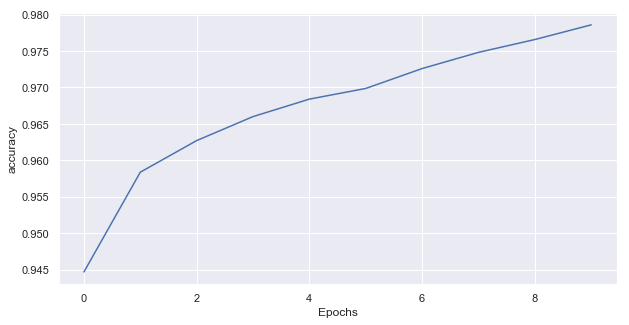

In [46]:
plt.plot(range(len(training.history['acc'])), training.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

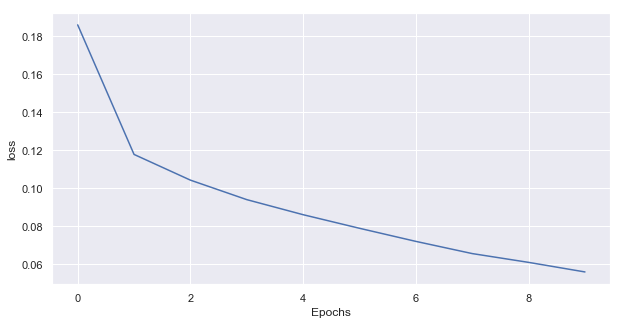

In [47]:
plt.plot(range(len(training.history['loss'])), training.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

###### Сохранение модели, чтобы потом можно было загрузить готовую и не фитить заново

In [23]:
# сохраняем в json

import os
from keras.models import model_from_json

model_json = model.to_json()
with open("submit_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("submit_model.h5")
print("Model saved to disk")

Model saved to disk


In [24]:
# если хотим загрузить её

# json_file = open('model.json', 'r')
# loaded_model = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)

## если хотим загрузить веса в новую модель
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

###### Опять смотрим на данные, делаем те же манипуляции, что и с train

In [25]:
# читаем test
test = pd.read_csv('test.csv')
test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,feature_769
0,0.291123,-0.253527,0.083138,0.135609,-0.076418,-0.633257,-0.246189,-0.042812,0.110341,-0.698179,...,-0.180544,0.720984,-0.048264,0.168162,-0.040482,-0.789424,0.728364,0.194325,46,8
1,0.163060,0.234249,-0.548482,-0.342477,-0.249341,-0.985170,0.162305,-0.148927,0.142731,-0.011801,...,0.069228,-0.050886,-0.565478,0.064885,0.066026,-0.407953,-0.025636,0.636805,39,6
2,0.703451,0.098007,0.544434,0.014882,0.518644,-1.115419,-1.167563,1.226244,1.086993,-0.053461,...,-1.328980,-0.004549,-1.039244,0.413667,-0.353347,1.104391,-0.833524,0.122031,15,1
3,0.061817,0.186173,0.763211,1.427817,-0.001758,0.213115,-0.646739,0.179483,0.124432,0.776010,...,-0.010719,0.660402,-1.323791,-0.091303,0.477664,0.746058,-0.441786,0.078916,15,2
4,0.899542,-0.470085,0.829839,-0.233863,-0.282362,-0.952958,0.393720,0.159785,-0.751585,-1.159093,...,-0.806075,0.534299,-0.993201,0.368099,0.368674,-0.500146,-0.428940,0.510619,2,1


In [26]:
test.shape

(44747, 770)

In [27]:
# так же оптимизируем, как и на train
test.iloc[:,-1] = np.log(test.iloc[:,-1])
test.iloc[:,-2] = np.log(test.iloc[:,-2])
test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,feature_769
0,0.291123,-0.253527,0.083138,0.135609,-0.076418,-0.633257,-0.246189,-0.042812,0.110341,-0.698179,...,-0.180544,0.720984,-0.048264,0.168162,-0.040482,-0.789424,0.728364,0.194325,3.828641,2.079442
1,0.163060,0.234249,-0.548482,-0.342477,-0.249341,-0.985170,0.162305,-0.148927,0.142731,-0.011801,...,0.069228,-0.050886,-0.565478,0.064885,0.066026,-0.407953,-0.025636,0.636805,3.663562,1.791759
2,0.703451,0.098007,0.544434,0.014882,0.518644,-1.115419,-1.167563,1.226244,1.086993,-0.053461,...,-1.328980,-0.004549,-1.039244,0.413667,-0.353347,1.104391,-0.833524,0.122031,2.708050,0.000000
3,0.061817,0.186173,0.763211,1.427817,-0.001758,0.213115,-0.646739,0.179483,0.124432,0.776010,...,-0.010719,0.660402,-1.323791,-0.091303,0.477664,0.746058,-0.441786,0.078916,2.708050,0.693147
4,0.899542,-0.470085,0.829839,-0.233863,-0.282362,-0.952958,0.393720,0.159785,-0.751585,-1.159093,...,-0.806075,0.534299,-0.993201,0.368099,0.368674,-0.500146,-0.428940,0.510619,0.693147,0.000000


In [28]:
test.isnull().sum().sum()

0

In [38]:
# делаем предикшн
y_pred = model.predict_classes(np.array(test))

In [39]:
# переводим в df
pred = pd.DataFrame(y_pred)
pred.head()

,0
0,7
1,7
2,7
3,7
4,7


In [40]:
# смотрим предиктнутое распределение классов
pd.value_counts(pred[0])

7     39825
4      1520
11      657
5       491
6       487
1       340
9       299
0       298
10      225
12      172
8       160
3       117
13       97
2        59
Name: 0, dtype: int64

##### Ниже обработка данных для сабмита

In [32]:
pred.columns = ['class_label']
pred.head()

,class_label
0,7
1,7
2,7
3,7
4,7


In [34]:
pred['id']=pred.index
pred = pred.reset_index(drop=True)
pred.head()

,class_label,id
0,7,0
1,7,1
2,7,2
3,7,3
4,7,4


In [35]:
pred = pred[['id', 'class_label']]
pred.head()

,id,class_label
0,0,7
1,1,7
2,2,7
3,3,7
4,4,7


In [36]:
pred.to_csv('model_submit.csv', index=False)

## Kaggle score = 0.966